In [20]:
import torch
from transformers import ViTImageProcessor, ViTForImageClassification
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np

In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224').to(device)
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model.eval()
torch.no_grad()

c:\Projects\AdvAttack\.conda\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [22]:
def viewBatch(model, dataLoader):
    images, labels = next(iter(dataLoader))
    outputs = model(images.to(device))
    val, idx = torch.max(outputs.logits, dim=1)
    idx = idx.tolist()

    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))  # Create a 4x4 grid of subplots
    axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

    for i, (img, id) in enumerate(zip(images[:16], idx[:16])):
        img = img.numpy().transpose((1, 2, 0))  # Convert tensor to numpy and change C, H, W to H, W, C
        img = np.clip(img, 0, 1)  # Ensure pixel values are valid for display
        axes[i].imshow(img)
        labels = model.config.id2label[id]
        axes[i].set_title(f'Classification: {labels.split(",")[0]}')  # Set the title to the label of the image
        axes[i].axis('off')  # Turn off axis numbers and ticks

    plt.tight_layout()  # Adjust layout to make room for titles and ensure plots don't overlap
    plt.show()

In [23]:
def process_image(image):
    return processor(image, return_tensors="pt").pixel_values.squeeze(0)

dataIN = datasets.ImageFolder('./imagenette', transform=transforms.Lambda(process_image))
# Note, DataLoader breaks with num_workers > 0
dataLoader = torch.utils.data.DataLoader(dataIN,
                                          batch_size=16,
                                          shuffle=True,
                                          num_workers=0)

In [24]:
images, labels = next(iter(dataLoader))

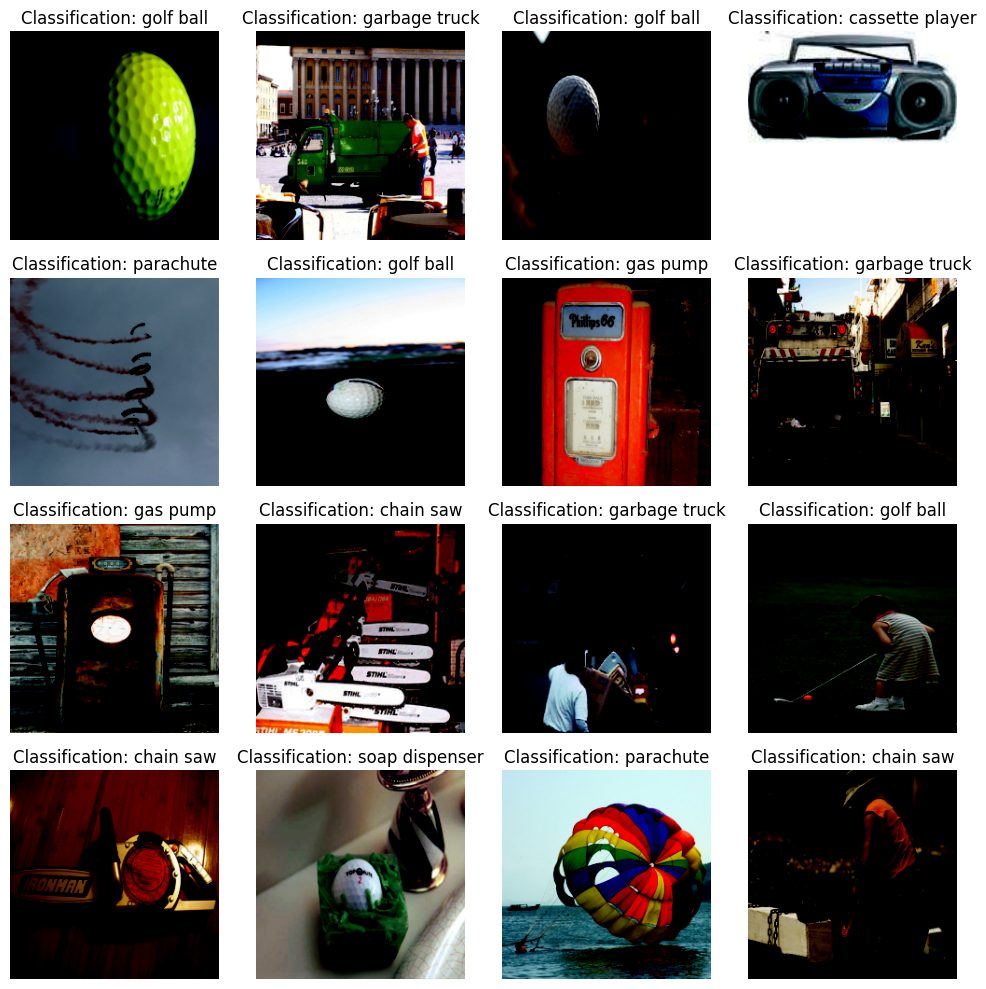

In [25]:
viewBatch(model, dataLoader)